# Obesity Status Based on Eating Habits and Physical Condition
by Anam Khan, Farah Mallah, Liis Usin, Reihaneh Sadraei

## Explore the data
Loading the dataset and displaying basic information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data set and check the values present

data = pd.read_csv('ObesityDataSet.csv', delimiter=',')
print(str(data.shape[0])+' rows,', len(data.columns), 'columns')
data.sample(5)

2111 rows, 17 columns


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
287,Female,18.000000,1.600000,58.000000,yes,yes,2.000000,3.000000,Sometimes,no,3.000000,no,3.000000,0.000000,no,Public_Transportation,Normal_Weight
1941,Female,26.000000,1.618867,110.777391,yes,yes,3.000000,3.000000,Sometimes,no,2.618198,no,0.000000,0.380695,Sometimes,Public_Transportation,Obesity_Type_III
1699,Male,39.825592,1.706741,108.012603,yes,yes,2.487781,3.755976,Sometimes,no,1.000000,no,1.860765,0.000000,no,Automobile,Obesity_Type_II
1187,Male,35.719457,1.685947,83.325800,yes,yes,2.000000,1.009426,Sometimes,no,2.136398,no,1.060349,0.000000,no,Automobile,Overweight_Level_II
1378,Male,32.895637,1.783901,103.771371,yes,yes,2.902469,1.734762,Sometimes,no,2.600238,no,2.113992,0.584755,Sometimes,Automobile,Obesity_Type_I


In [3]:
# check if any none/null values

data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
# basic information about each columns and its dataset
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
# the column to analyze and to categorize
column_name = 'NObeyesdad'

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'NObeyesdad': 7
Value counts:
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64


Testing some catagorical values and visualizing them

In [7]:
# the column to analyze
column_name = 'CAEC'

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'CAEC': 4
Value counts:
Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64


In [8]:
# the column to analyze
column_name = 'CALC' 

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'CALC': 4
Value counts:
Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64


In [9]:
# the column to analyze
column_name = 'MTRANS' 

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'MTRANS': 5
Value counts:
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64


In [10]:
# Merging the catagories that have less than 20 occurances into a catagory called other
threshold = 20  
data['MTRANS'] = data['MTRANS'].apply(lambda x: x if data['MTRANS'].value_counts()[x] >= threshold else 'Other')

## Visualize relationships / plot the data

In [11]:
# Create a DataFrame from the data
df = pd.DataFrame(data)

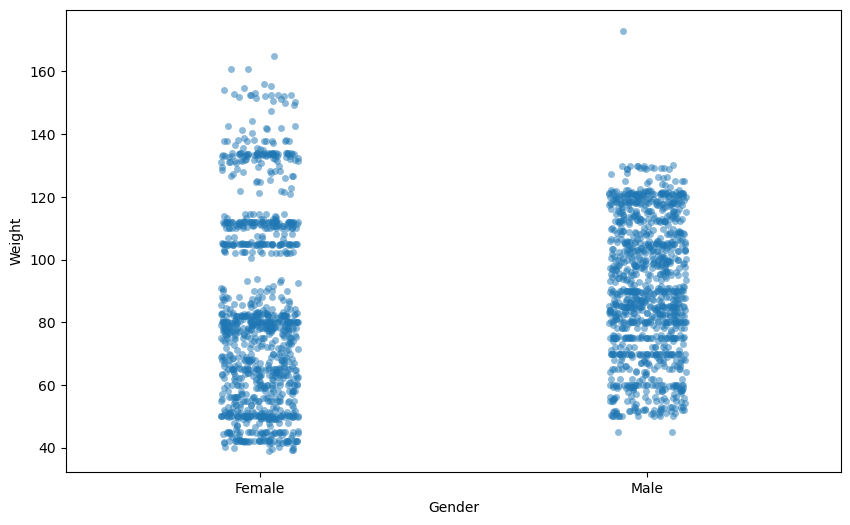

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['Gender'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

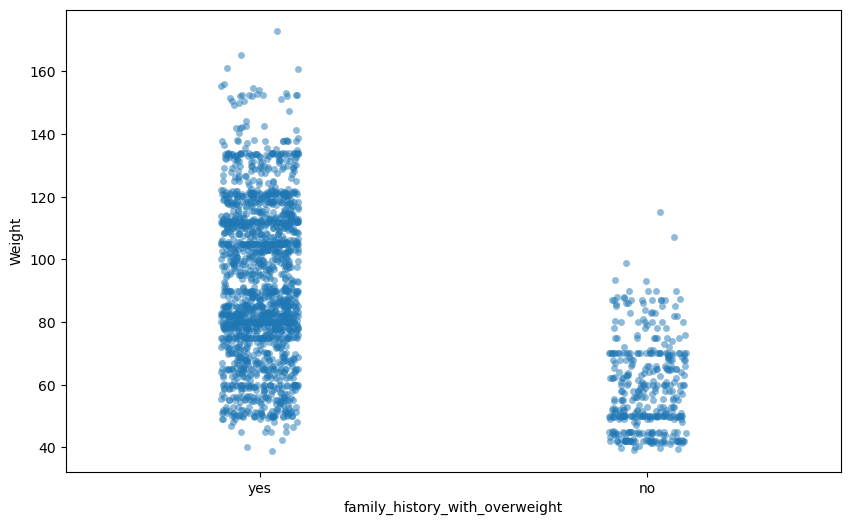

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['family_history_with_overweight'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

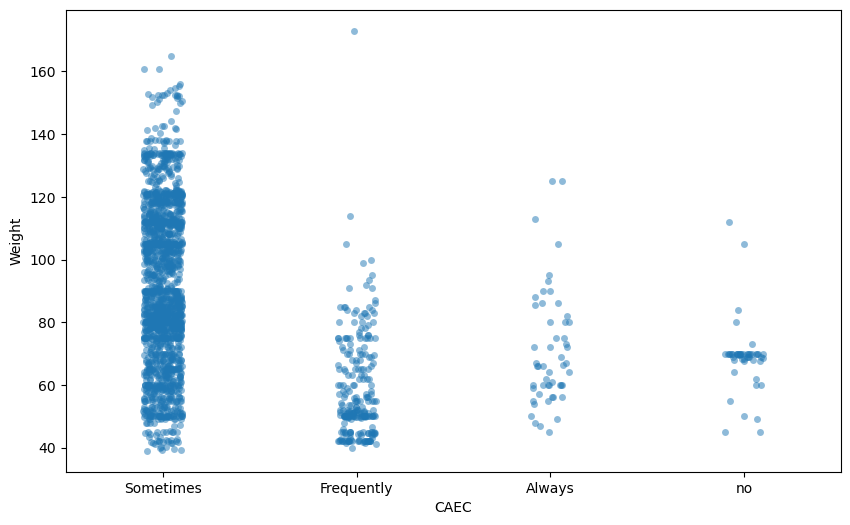

In [14]:
# eating food between meals
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['CAEC'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

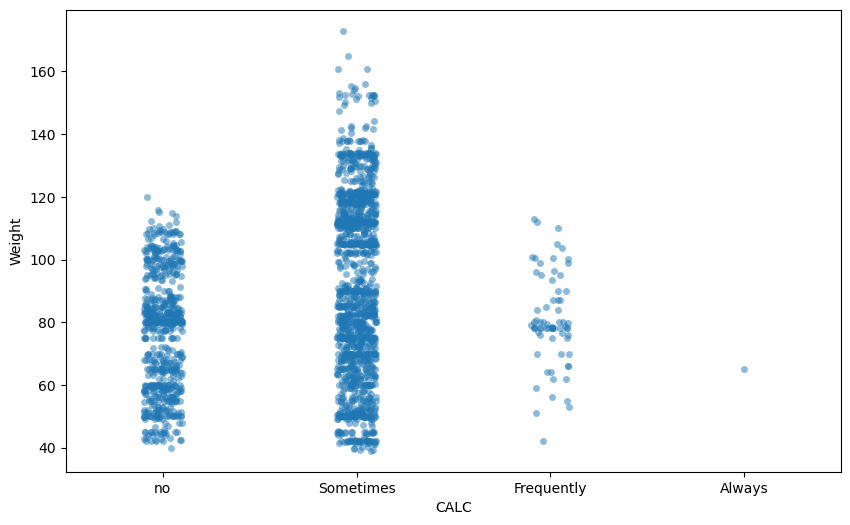

In [15]:
# Consumption of alcohol
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['CALC'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

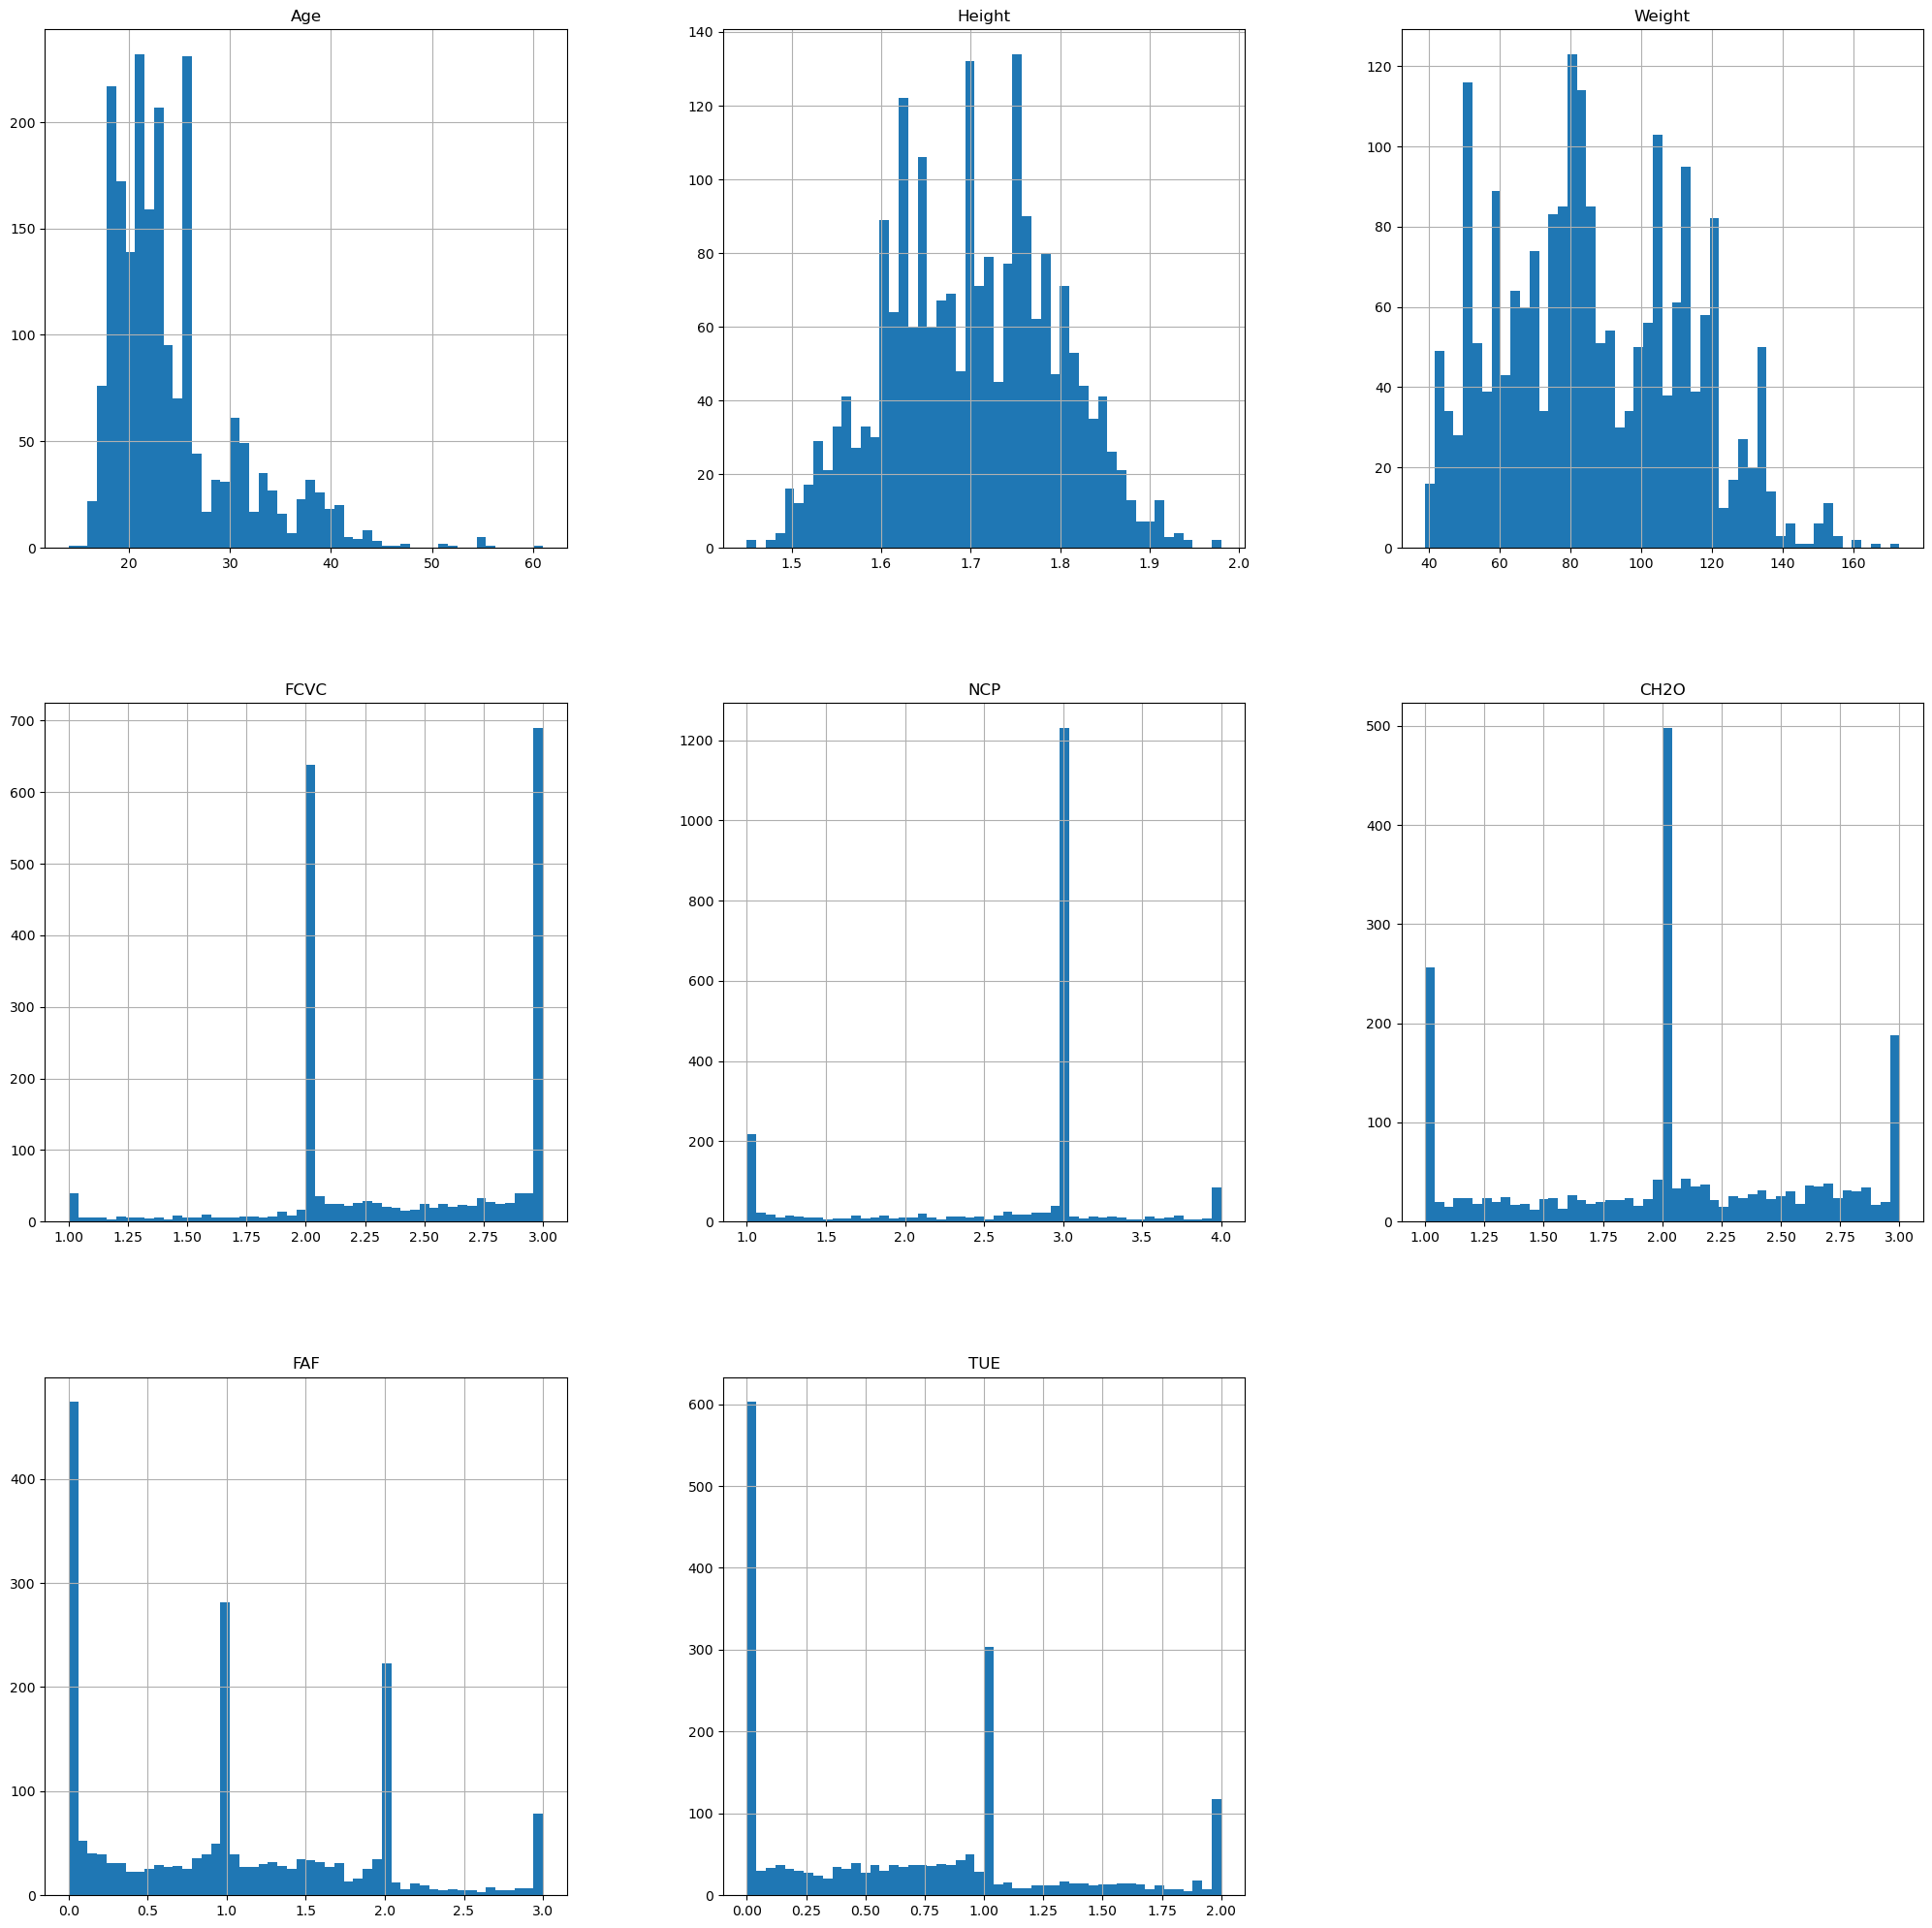

In [16]:
%matplotlib inline
data.hist(bins=50, figsize=(25,25))
plt.show()

In [17]:
df.replace({"NObeyesdad":{        
    "Obesity_Type_III":6, # HIGHEST risk
    "Obesity_Type_II":5,
    "Obesity_Type_I":4,
    "Overweight_Level_II":3,
    "Overweight_Level_I":2,
    "Normal_Weight":1,
    "Insufficient_Weight":0, # lowert risk
}},inplace=True)

The attributes related with the eating habits are:
- Frequent consumption of high caloric food (FAVC),
- Frequency of consumption of vegetables (FCVC),
- Number of main meals (NCP),
- Consumption of food between meals (CAEC),
- Consumption of water daily (CH20),
- and Consumption of alcohol (CALC).

The attributes related with the physical condition are:
- Calories consumption monitoring (SCC),
- Physical activity frequency (FAF),
- Time using technology devices (TUE),
- Transportation used (MTRANS),

<AxesSubplot:>

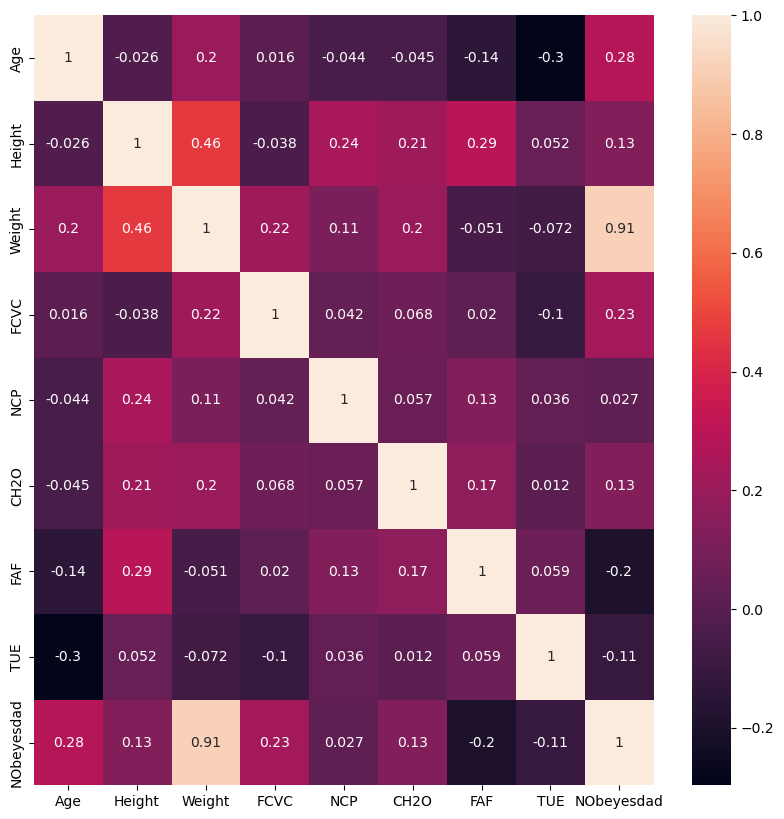

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot=True)

## Prepare the data
Preparing the data for modeling by handling missing values, encoding categorical features, scaling features, and splitting the data into training and testing sets.

In [19]:
# separating the last column from the rest

# BASED ON WEIGHT
df = df.drop("NObeyesdad", axis=1)

In [20]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

In [21]:
df.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
658,Female,19.599040,1.566501,41.706283,no,yes,2.967853,1.000000,Frequently,no,1.131185,no,0.000000,0.504176,Sometimes,Public_Transportation
2031,Female,26.000000,1.634894,111.946321,yes,yes,3.000000,3.000000,Sometimes,no,2.737353,no,0.000000,0.076094,Sometimes,Public_Transportation
868,Female,21.837058,1.558045,63.597633,no,yes,2.539150,1.590982,Sometimes,no,1.977801,no,1.264616,0.000000,Sometimes,Public_Transportation
1015,Male,21.808159,1.650000,80.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.826609,2.000000,no,Public_Transportation
1846,Female,19.885655,1.763343,133.952675,yes,yes,3.000000,3.000000,Sometimes,no,2.835622,no,1.419473,0.816986,Sometimes,Public_Transportation


In [22]:
X_original=df_encoded.drop(columns="Weight")
y=df_encoded["Weight"]

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
def transform_data(X, X_test):
    numeric_columns = X.select_dtypes(exclude='object').columns

    numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('preprocessing', PolynomialFeatures(degree=2)),
    ('scaling',StandardScaler(with_mean=True))
    ])

    processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns)
    ])
    processing.fit(X)
    return processing.transform(X), processing.transform(X_test)

## Create Training and Test set

In [24]:
# splitting to training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

print('Train X dataset shape:',X_train.shape)
print('Train y dataset shape', y_train.shape)
print('Test X dataset shape:',X_test.shape)
print('Test y dataset shape', y_test.shape)

Train X dataset shape: (1688, 29)
Train y dataset shape (1688,)
Test X dataset shape: (423, 29)
Test y dataset shape (423,)


In [25]:
X_train, X_test = transform_data(X_train, X_test)

## Helper function

In [26]:
def evaluate_the_model(y_test, y_pred):
    # Evaluating the model

    # Mean Absolute Error (MAE):
    # average absolute difference between the predicted and actual values
    mae = mean_absolute_error(y_test, y_pred)

    # Mean Squared Error (MSE):
    # Performance of a predictive model - the smaller the value the better
    mse = mean_squared_error(y_test, y_pred)

    # Root Mean Squared Error (RMSE):
    # emphasizes larger errors
    rmse = math.sqrt(mse)

    # R-squared (R2):
    # fit of a regression model ~0.8 is good, but not great 
    r2 = r2_score(y_test, y_pred)

    # Mean Absolute Percentage Error (MAPE):
    # percentage difference between the predicted and actual values
    mape = (1/len(y_test)) * sum(abs((y_test - y_pred) / y_test)) * 100
    
    
    print("Mean Absolute Error (MAE) %.2f:" % mae)
    print("Mean Squared Error (MSE) %.2f:" % mse)
    print("Root Mean Squared Error (RMSE) %.2f:" % rmse)
    print("R-squared Score (R^2) %.2f:" % r2)
    print("Mean Absolute Percentage Error (MAPE) %.2f:" % mape)

In [27]:
def display_residualplot(residuals, y_pred):
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residual Plot')
    plt.show()

# Build ML models

## Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import math

In [29]:
# Creating and training the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

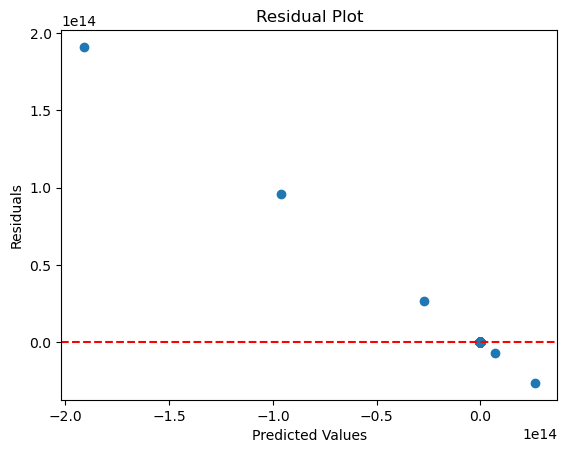

Mean Absolute Error (MAE) 820831944863.76:
Mean Squared Error (MSE) 111611156942795361468022784.00:
Root Mean Squared Error (RMSE) 10564618163606.07:
R-squared Score (R^2) -158288790812253145268224.00:
Mean Absolute Percentage Error (MAPE) 1131187860689.26:


In [30]:
y_pred1 = linear_model.predict(X_test)

residuals1 = y_test - y_pred1
display_residualplot(residuals1, y_pred1)
evaluate_the_model(y_test, y_pred1)

## Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [32]:
poly_model = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

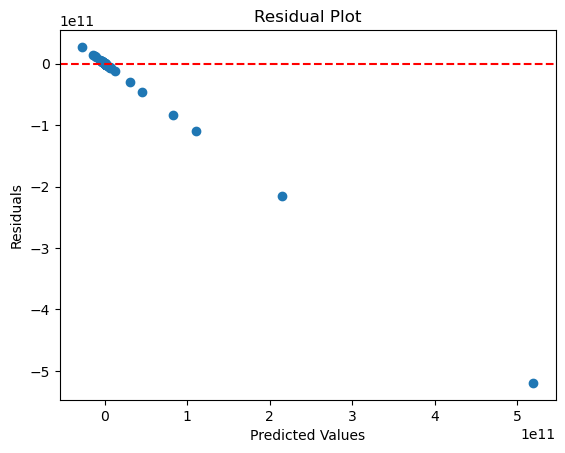

Mean Absolute Error (MAE) 2763208050.22:
Mean Squared Error (MSE) 803449602778442498048.00:
Root Mean Squared Error (RMSE) 28345186589.23:
R-squared Score (R^2) -1139465530023736576.00:
Mean Absolute Percentage Error (MAPE) 3701526100.49:


In [33]:
y_pred2 = poly_model.predict(X_test)

residuals2 = y_test - y_pred2
display_residualplot(residuals2, y_pred2)
evaluate_the_model(y_test, y_pred2)

## Ridge Regression

In [34]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

In [35]:
# Creating and fitting the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # 'alpha' is the regularization parameter
ridge_model.fit(X_train, y_train)


Ridge()

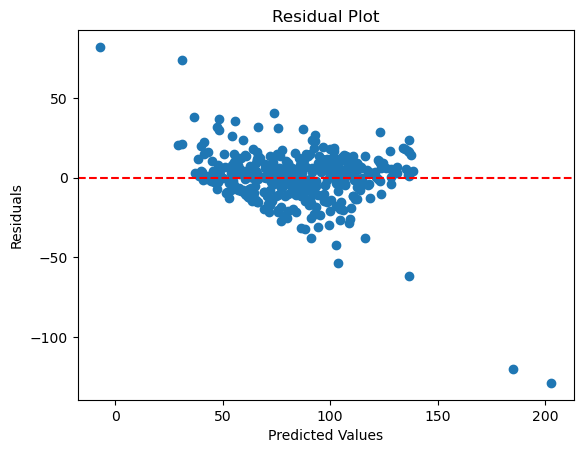

Mean Absolute Error (MAE) 10.43:
Mean Squared Error (MSE) 268.35:
Root Mean Squared Error (RMSE) 16.38:
R-squared Score (R^2) 0.62:
Mean Absolute Percentage Error (MAPE) 13.48:


In [36]:
y_pred3 = ridge_model.predict(X_test)

residuals3 = y_test - y_pred3
display_residualplot(residuals3, y_pred3)
evaluate_the_model(y_test, y_pred3)

## Lasso Regression

In [37]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

In [38]:
# Creating and fitting the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # 'alpha' is the regularization parameter
lasso_model.fit(X_train, y_train)

Lasso()

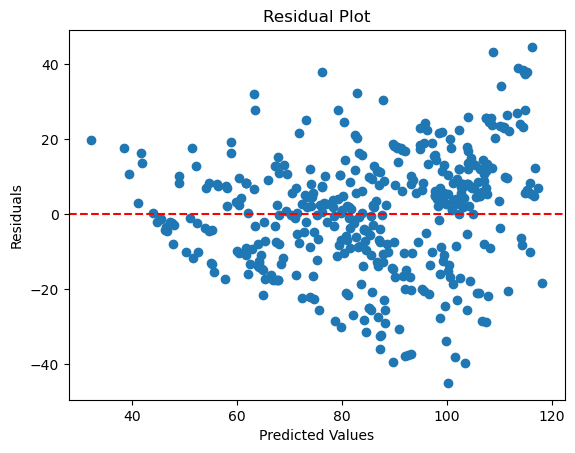

Mean Absolute Error (MAE) 12.57:
Mean Squared Error (MSE) 248.34:
Root Mean Squared Error (RMSE) 15.76:
R-squared Score (R^2) 0.65:
Mean Absolute Percentage Error (MAPE) 15.97:


In [39]:
y_pred4 = lasso_model.predict(X_test)

residuals4 = y_test - y_pred4
display_residualplot(residuals4, y_pred4)
evaluate_the_model(y_test, y_pred4)

## ElasticNet Regression

In [40]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [41]:
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_model.fit(X_train, y_train)

ElasticNet()

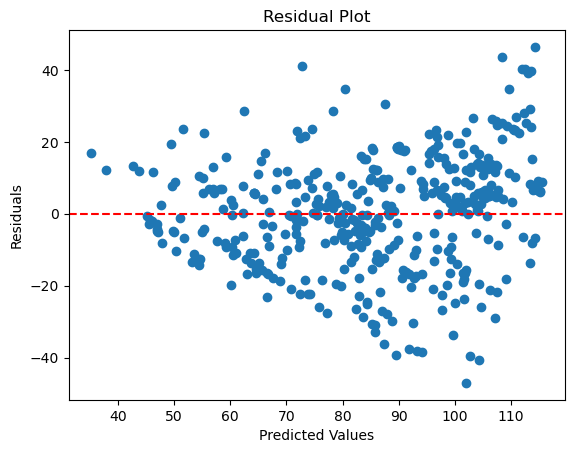

Mean Absolute Error (MAE) 12.42:
Mean Squared Error (MSE) 247.35:
Root Mean Squared Error (RMSE) 15.73:
R-squared Score (R^2) 0.65:
Mean Absolute Percentage Error (MAPE) 15.78:


In [42]:
y_pred5 = elasticnet_model.predict(X_test)

residuals5 = y_test - y_pred5
display_residualplot(residuals5, y_pred5)
evaluate_the_model(y_test, y_pred5)

## Support Vector Regression (SVR)

In [43]:
from sklearn.svm import SVR
from sklearn.datasets import make_regression

In [44]:
svr_model = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel for non-linear regression
svr_model.fit(X_train, y_train)

SVR()

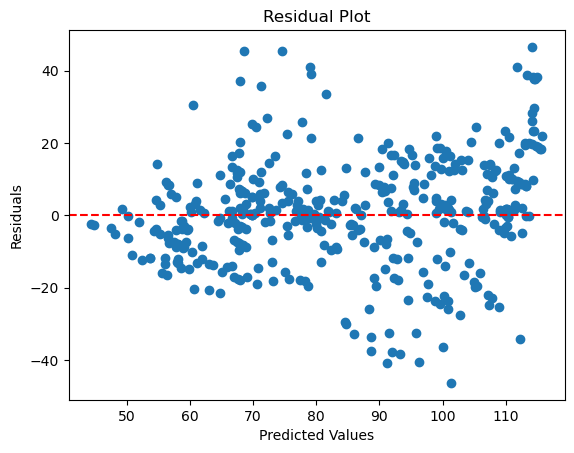

Mean Absolute Error (MAE) 11.06:
Mean Squared Error (MSE) 224.76:
Root Mean Squared Error (RMSE) 14.99:
R-squared Score (R^2) 0.68:
Mean Absolute Percentage Error (MAPE) 13.91:


In [45]:
y_pred6 = svr_model.predict(X_test)

residuals6 = y_test - y_pred6
display_residualplot(residuals6, y_pred6)
evaluate_the_model(y_test, y_pred6)

## Decision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

In [47]:
decision_tree = DecisionTreeRegressor(max_depth=5)  # Set the max depth to avoid overfitting
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

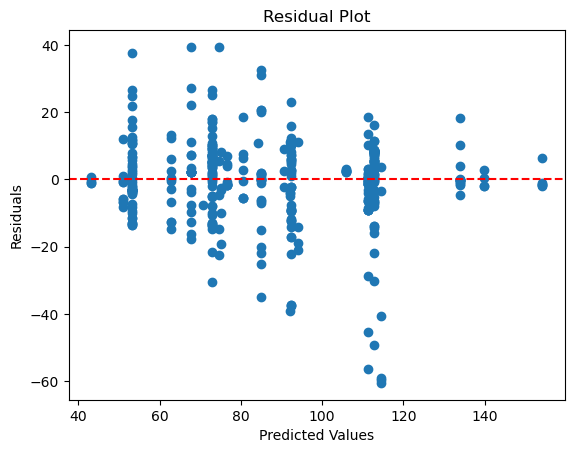

Mean Absolute Error (MAE) 8.52:
Mean Squared Error (MSE) 163.31:
Root Mean Squared Error (RMSE) 12.78:
R-squared Score (R^2) 0.77:
Mean Absolute Percentage Error (MAPE) 11.59:


In [48]:
y_pred7 = decision_tree.predict(X_test)

residuals7 = y_test - y_pred7
display_residualplot(residuals7, y_pred7)
evaluate_the_model(y_test, y_pred7)

## Random Forest Regression

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [50]:
random_forest = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

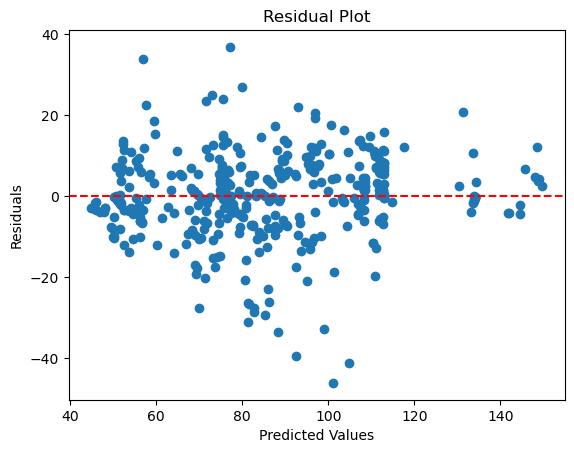

Mean Absolute Error (MAE) 7.62:
Mean Squared Error (MSE) 108.48:
Root Mean Squared Error (RMSE) 10.42:
R-squared Score (R^2) 0.85:
Mean Absolute Percentage Error (MAPE) 10.07:


In [51]:
y_pred8 = random_forest.predict(X_test)

residuals8 = y_test - y_pred8
display_residualplot(residuals8, y_pred8)
evaluate_the_model(y_test, y_pred8)

## Gradient Boosting Regression

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

In [53]:
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

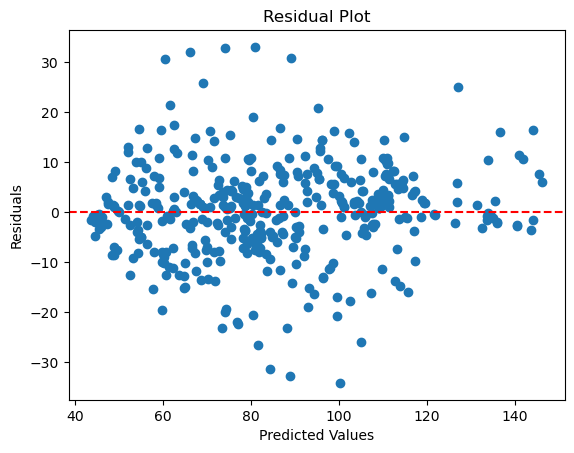

Mean Absolute Error (MAE) 6.89:
Mean Squared Error (MSE) 89.31:
Root Mean Squared Error (RMSE) 9.45:
R-squared Score (R^2) 0.87:
Mean Absolute Percentage Error (MAPE) 8.95:


In [54]:
y_pred9 = gradient_boosting.predict(X_test)

residuals9 = y_test - y_pred9
display_residualplot(residuals9, y_pred9)
evaluate_the_model(y_test, y_pred9)

## XGBoost (Extreme Gradient Boosting)

    ANAM PROBABLY HAS :D

## LGBM (Light Gradient Boosting Machine)

In [55]:
# !pip install lightgbm -- NEEDS this
import lightgbm as lgb
from sklearn.datasets import make_regression

In [56]:
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test)

params = {
    'objective': 'regression',  
    'metric': 'l2' 
}

num_round = 100  # Number of boosting iterations
lgb_model = lgb.train(params, lgb_train, num_round)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27270
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 350
[LightGBM] [Info] Start training from score 86.598197


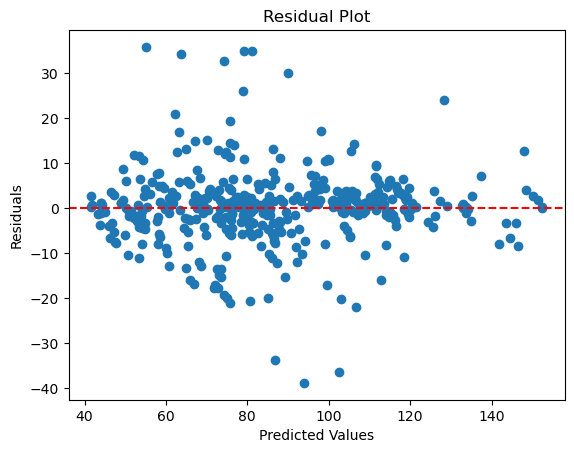

Mean Absolute Error (MAE) 5.26:
Mean Squared Error (MSE) 70.33:
Root Mean Squared Error (RMSE) 8.39:
R-squared Score (R^2) 0.90:
Mean Absolute Percentage Error (MAPE) 6.94:


In [57]:
y_pred10 = lgb_model.predict(X_test)

residuals10 = y_test - y_pred10
display_residualplot(residuals10, y_pred10)
evaluate_the_model(y_test, y_pred10)

## Neural Network Regression

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error on Test Data:", mae)

# Predict using the trained model
predictions = model.predict(X_test)

Epoch 1/50
53/53 [==============================] - 1s 9ms/step - loss: 6298.1582 - mae: 74.8886 - val_loss: 3162.6909 - val_mae: 52.7209
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 997.5580 - mae: 25.0395 - val_loss: 344.2721 - val_mae: 14.3225
Epoch 3/50
53/53 [==============================] - 0s 4ms/step - loss: 251.1935 - mae: 12.1813 - val_loss: 237.4496 - val_mae: 11.7363
Epoch 4/50
53/53 [==============================] - 0s 5ms/step - loss: 182.4501 - mae: 10.1289 - val_loss: 194.3442 - val_mae: 10.2419
Epoch 5/50
53/53 [==============================] - 0s 4ms/step - loss: 156.5543 - mae: 9.1690 - val_loss: 173.9780 - val_mae: 9.6384
Epoch 6/50
53/53 [==============================] - 0s 4ms/step - loss: 140.9901 - mae: 8.6667 - val_loss: 159.7724 - val_mae: 9.0504
Epoch 7/50
53/53 [==============================] - 0s 5ms/step - loss: 132.7030 - mae: 8.3326 - val_loss: 155.6679 - val_mae: 8.9092
Epoch 8/50
53/53 [==============================] - 

14/14 [==============================] - 0s 2ms/step


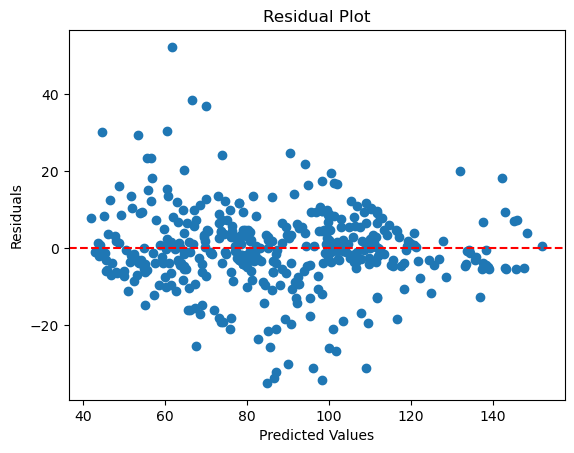

Mean Absolute Error (MAE) 7.23:
Mean Squared Error (MSE) 108.66:
Root Mean Squared Error (RMSE) 10.42:
R-squared Score (R^2) 0.85:
Mean Absolute Percentage Error (MAPE) 9.55:


In [60]:
y_pred11 = model.predict(X_test).flatten()  # Flatten the predictions

residuals11 = y_test - y_pred11
display_residualplot(residuals11, y_pred11)
evaluate_the_model(y_test, y_pred11)

## KNeighborsRegressor

In [61]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor

In [62]:
k_neighbors = KNeighborsRegressor(n_neighbors=5)  # Define the number of neighbors
k_neighbors.fit(X_train, y_train)

KNeighborsRegressor()

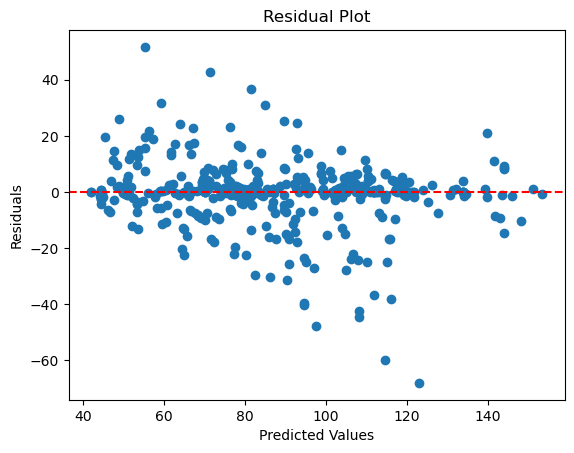

Mean Absolute Error (MAE) 6.87:
Mean Squared Error (MSE) 142.18:
Root Mean Squared Error (RMSE) 11.92:
R-squared Score (R^2) 0.80:
Mean Absolute Percentage Error (MAPE) 9.31:


In [63]:
y_pred12 = k_neighbors.predict(X_test)

residuals12 = y_test - y_pred12
display_residualplot(residuals12, y_pred12)
evaluate_the_model(y_test, y_pred12)

## BaggingRegressor

In [64]:
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor

In [65]:
base_model = DecisionTreeRegressor()  # Defining the base estimator
bagging = BaggingRegressor(base_model, n_estimators=10, random_state=42)  # Number of base estimators
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)

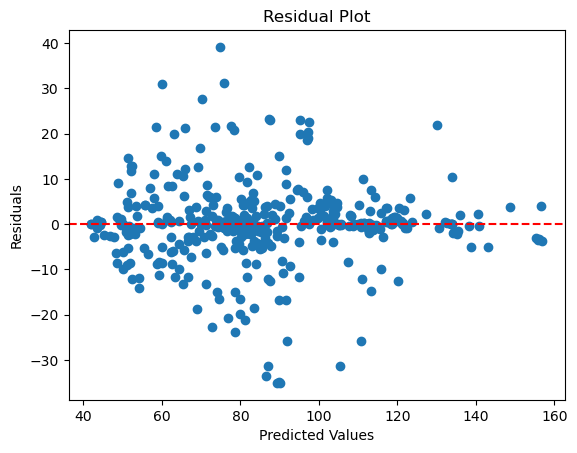

Mean Absolute Error (MAE) 5.37:
Mean Squared Error (MSE) 79.76:
Root Mean Squared Error (RMSE) 8.93:
R-squared Score (R^2) 0.89:
Mean Absolute Percentage Error (MAPE) 7.29:


In [66]:
y_pred13 = bagging.predict(X_test)

residuals13 = y_test - y_pred13
display_residualplot(residuals13, y_pred13)
evaluate_the_model(y_test, y_pred13)

## AdaBoostRegressor

In [67]:
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor

In [68]:
base_model = DecisionTreeRegressor(max_depth=2)  # Defining the base estimator
adaboost = AdaBoostRegressor(base_model, n_estimators=50, random_state=42)  # Number of base estimators
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                  random_state=42)

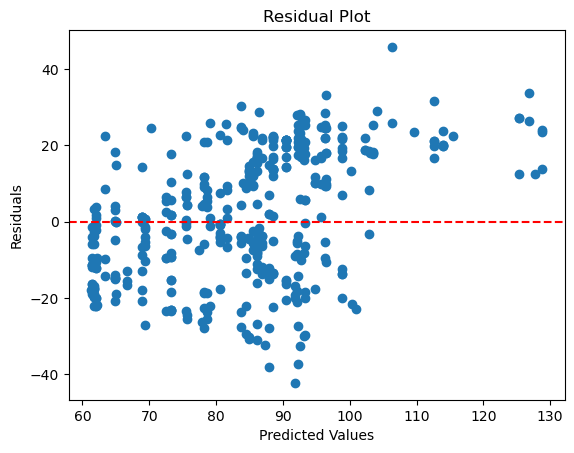

Mean Absolute Error (MAE) 14.66:
Mean Squared Error (MSE) 291.43:
Root Mean Squared Error (RMSE) 17.07:
R-squared Score (R^2) 0.59:
Mean Absolute Percentage Error (MAPE) 18.49:


In [69]:
y_pred14 = adaboost.predict(X_test)

residuals14 = y_test - y_pred14
display_residualplot(residuals14, y_pred14)
evaluate_the_model(y_test, y_pred14)

## ExtraTreesRegressor

In [70]:
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor

In [71]:
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)
extra_trees.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

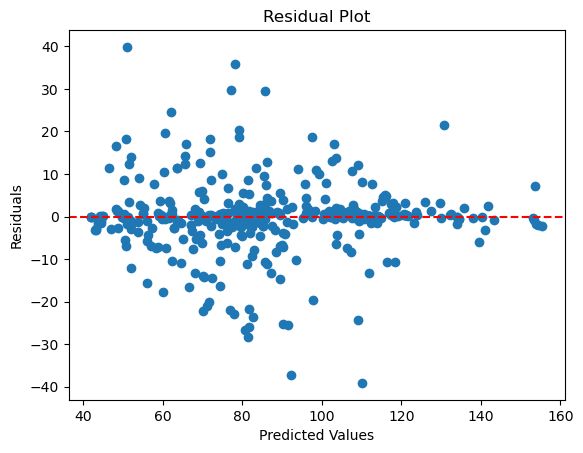

Mean Absolute Error (MAE) 4.63:
Mean Squared Error (MSE) 69.04:
Root Mean Squared Error (RMSE) 8.31:
R-squared Score (R^2) 0.90:
Mean Absolute Percentage Error (MAPE) 6.36:


In [72]:
y_pred15 = extra_trees.predict(X_test)

residuals15 = y_test - y_pred15
display_residualplot(residuals15, y_pred15)
evaluate_the_model(y_test, y_pred15)